## FEEDBACK ANALYSIS

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

## YELP

In [2]:
yelp = pd.read_csv('C:/Users/ushai/Downloads/sentiment labelled sentences (1)/sentiment labelled sentences/yelp_labelled.txt', header=None,delimiter = "\t")
yelp.head(2)

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0


In [3]:
# Naming the columns
yelp.columns = ['Review', 'Feedback']
yelp.head(2)

,Review,Feedback
0,Wow... Loved this place.,1
1,Crust is not good.,0


In [4]:
# Changing values of the 'Feedback' column.
yelp.Feedback.replace([1,0], ['positive', 'negative'], inplace=True)
yelp.head(2)

,Review,Feedback
0,Wow... Loved this place.,positive
1,Crust is not good.,negative


### KEY WORDS

In [5]:
# Designating keywords
keywords = ['because','no',"didn't",'worst','damn','but','only','batter','hard','bye','never','go','again','least',"don't",'ever'\
,'bad','other',"wasn't",'down','extemely','little','slow','back','literally','absolutely','totally','back','off','bug'\
,'worth','enough','bad','sucks','zero','waste','nothing','felt','again','quality','will','disappointed','slow',"won't"\
,'why','never','before','probably','really',"can't",'return','rude','few','doubt','unless','wasting','mediocre','wait'\
,'minutes','ever','overall','find', 'hours','elsewhere','ordered', 'tasteless','definitely','running',"don't",'not','cold'\
,'leave','without','either','rarely','horrible','rather','recommend','terrible','guess','trying','hard','poor','management'\
,'waited','else','after','hate','ever!','waiting','cheap','impressed','sick','rare','cold','walked','should','really','please'\
,'old',"wouldn't",'barely','long','attitudes','dirt','sugary','unfortunately','charcoal','single','needed','finally',"won't"\
,'away','average','considering','overpriced','deserves','dirty', 'frozen','believe','insulted','judge','needless','however'\
,'bad','lost','fairly','clean','half','pulled','probably','lacked','busy','thought','asked','possible',"We've",'behind','suck'\
,'sucked','yet','under','beat','spend','awful','texture', 'lacking','overall','time']

for key in keywords:
    yelp[str(key)] = yelp.Review.str.contains(' ' + str(key) + ' ', case=False)

# Also including AllCaps
yelp['allcaps'] = yelp.Review.str.isupper()
yelp.head(2)

,Review,Feedback,because,no,didn't,worst,damn,but,only,batter,...,sucked,yet,under,beat,spend,awful,texture,lacking,time,allcaps
0,Wow... Loved this place.,positive,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,negative,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# Converting the 'Feedback' column to boolean (From positive and negative to True or False)
yelp['Feedback'] = (yelp['Feedback'] == 'negative')
yelp.head(2)

,Review,Feedback,because,no,didn't,worst,damn,but,only,batter,...,sucked,yet,under,beat,spend,awful,texture,lacking,time,allcaps
0,Wow... Loved this place.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### HEAT MAP - YELP

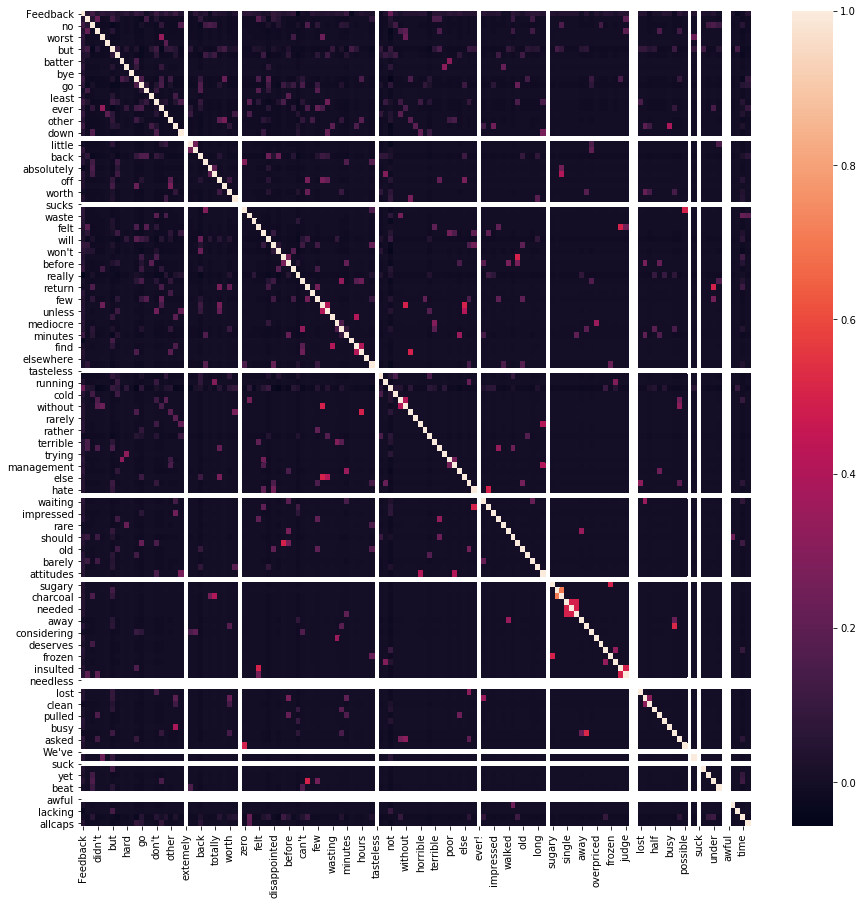

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(yelp.corr())

### SETTING UP DATA - YELP

In [8]:
# Setting up training data
data_yelp = yelp[keywords + ['allcaps']]
data_yelp.head(2)

,because,no,didn't,worst,damn,but,only,batter,hard,bye,...,yet,under,beat,spend,awful,texture,lacking,overall,time,allcaps
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# Setting up a target
target = yelp['Feedback']
target.head()

0    False
1     True
2     True
3    False
4    False
Name: Feedback, dtype: bool

In [10]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

In [11]:
# Instantiating our model and store it in a new variable.
bnb = BernoulliNB()

In [12]:
# Fit our model to the data.
bnb.fit(data_yelp, target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

### HOLDOUT GROUPS

In [14]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data_yelp, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data_yelp, target).score(data_yelp, target)))

With 20% Holdout: 0.67
Testing on Sample: 0.753


### CROSS VALIDATION

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data_yelp, target, cv=10)

array([0.72, 0.67, 0.8 , 0.64, 0.64, 0.7 , 0.75, 0.69, 0.71, 0.73])

## AMAZON

In [16]:
amazon = pd.read_csv('C:/Users/ushai/Downloads/sentiment labelled sentences (1)/sentiment labelled sentences/amazon_cells_labelled.txt', header=None,delimiter = "\t")
amazon.head(2)

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1


In [17]:
# Naming the columns
amazon.columns = ['Review', 'Feedback']
amazon.head(2)

,Review,Feedback
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1


In [18]:
# Changing values of the 'Feedback' column.
amazon.Feedback.replace([1,0], ['positive', 'negative'], inplace=True)
amazon.head(2)

,Review,Feedback
0,So there is no way for me to plug it in here i...,negative
1,"Good case, Excellent value.",positive


### SETTING UP DATA - AMAZON

In [19]:
for key in keywords:
    amazon[str(key)] = amazon.Review.str.contains(' ' + str(key) + ' ', case=False)

# Also including AllCaps
amazon['allcaps'] = amazon.Review.str.isupper()

In [20]:
# Setting up data for amazon
data_amazon = amazon[keywords + ['allcaps']]
data_amazon.head(2)

,because,no,didn't,worst,damn,but,only,batter,hard,bye,...,yet,under,beat,spend,awful,texture,lacking,overall,time,allcaps
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
# Fit our model to the data.
bnb.fit(data_amazon, target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [24]:
# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_amazon)

In [25]:
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(data_amazon.shape[0],(target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 429


### CONFUSION MATRIX

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[148, 352],
       [ 77, 423]], dtype=int64)

- 77 out of 429 errors are false negative, meaning 77 are negative feedback but labelled positive
- 352 out of 429 errors are false positive, meaning 352 are positive feedback messages but labelled negative.

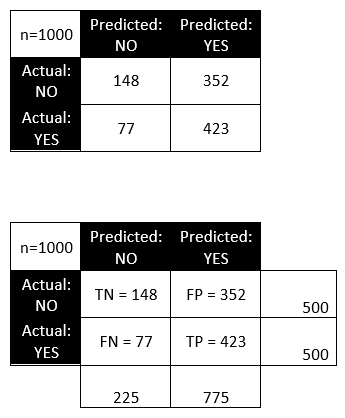

Accuracy: Overall, how often is the classifier correct?
o	(TP+TN)/total = (148+423)/1000 = 0.571
